### 1. INTRODUÇÃO E OBJETIVO  <h1>
<br>
<br>

#### *1.1 Contexto*
A reputação de uma empresa depende fortemente da satisfação de seus clientes — 
e as avaliações (review scores) são um reflexo direto dessa percepção.  
Neste estudo, utilizamos os **metadados da empresa Olist**, extraídos do **Kaggle**, 
para compreender como fatores como **localização**, **categoria do produto** e **atrasos nas entregas** 
influenciam as **notas de avaliação** dos clientes.  
O foco é identificar padrões que possam explicar variações na satisfação e destacar aspectos logísticos 
e regionais que impactam a experiência do consumidor.

<br>
<br>

#### *1.2 Questões a serem analisadas*
##### 🔹 Análise da Taxa de Atraso vs. Notas de Avaliação
- Qual é a **média de atraso nas entregas**?  
- Como as **notas de avaliação** variam entre pedidos **com e sem atraso**?  

##### 🔹 Análise Geográfica
- Em quais **zonas geográficas** (estados ou municípios) os pedidos são **mais frequentemente atrasados**?  

##### 🔹 Análise por Categoria de Produto
- Quais **categorias de produtos** concentram a maioria das **avaliações negativas**?  

##### 🔹 Análise Multifatorial
- O **atraso na entrega** é o único fator que reduz as **notas de avaliação**?  

**Subperguntas para investigar:**  
- Dentre as avaliações **abaixo da média**, qual porcentagem corresponde a **pedidos atrasados**?  
- Existe algum **estado** que contribui de forma desproporcional para o número de **avaliações ruins**?  

<br>
<br>

#### *1.3 Descrição dos Dados*
Será utilizado o conjunto de dados público "Brazilian E-Commerce Public Dataset by Olist".  
Ele possui informações anonimizadas sobre 100.000 pedidos feitos no Brasil entre 2016 e 2018.  
O mesmo é composto por diversos dados que descrevem o ciclo completo de um pedido, desde: 
a compra, o pagamento e o envio, até os produtos e a avaliação final.


### 2. TRATAMENTO DOS DADOS  <h1>

2.1 CARREGAMENTO DOS DADOS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

orders = pd.read_csv(r"datasets\olist_orders_dataset.csv")
product = pd.read_csv(r"datasets\olist_products_dataset.csv")
reviews = pd.read_csv(r"datasets\olist_order_reviews_dataset.csv")
geolocation = pd.read_csv(r"datasets\olist_geolocation_dataset.csv")
customers = pd.read_csv(r"datasets\olist_customers_dataset.csv")




In [2]:
###descobrir a média de atrasos nas entregas
##erificar pedidos com e sem atrasos e suas notas
##dentre as avaliações baixas quais representam atraso nas entregas
##qual categoria de produtos apresenta menor taxa de avaliação

2.2 ORGANIZAÇÃO E LIMPEZA DOS DADOS

In [4]:
# Criando cópia do DataFrame original
product_edit = product.copy()

#identificando os dados
product_edit.head()

#eliminando colunas irrelevantes
product_edit = product_edit.drop(columns=["product_id"])

#renomeando colunas
product_edit = product_edit.rename(columns={
    'product_category_name': 'categoria_produto',
    'product_name_lenght': 'tam_nome_produto',
    'product_description_lenght': 'tam_descricao_produto',
    'product_photos_qty': 'qtd_fotos_produto',
    'product_weight_g': 'peso_g',
    'product_length_cm': 'comprimento_cm',
    'product_height_cm': 'altura_cm',
    'product_width_cm': 'largura_cm'
})
product_edit

,categoria_produto,tam_nome_produto,tam_descricao_produto,qtd_fotos_produto,peso_g,comprimento_cm,altura_cm,largura_cm
0,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...
32946,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [5]:
# Criando cópia do DataFrame original
geolocation_edit = geolocation.copy()

#identificando os dados
geolocation_edit.head()

geolocation_edit = geolocation_edit.rename(columns={
    'geolocation_zip_code_prefix': 'cep_prefixo',
    'geolocation_lat': 'latitude',
    'geolocation_lng': 'longitude',
    'geolocation_city': 'cidade',
    'geolocation_state': 'estado'
})

In [6]:
# Criando cópia do DataFrame original
customers_edit = customers.copy()

# Identificando os dados
customers_edit.head()

# Eliminando colunas irrelevantes
# (customer_unique_id é redundante, porque cada linha já tem um customer_id único)
customers_edit = customers_edit.drop(columns=["customer_unique_id"])

# Renomeando colunas
customers_edit = customers_edit.rename(columns={
    'customer_id': 'id_cliente',
    'customer_zip_code_prefix': 'cep_prefixo',
    'customer_city': 'cidade_cliente',
    'customer_state': 'estado_cliente'
})

customers_edit.head()


,id_cliente,cep_prefixo,cidade_cliente,estado_cliente
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP


In [7]:
# Criando cópia do DataFrame original
orders_edit = orders.copy()

# Renomeando colunas
orders_edit = orders_edit.rename(columns={
    "order_delivered_customer_date": "data_entrega",
    "order_estimated_delivery_date": "data_prevista",
    "order_purchase_timestamp": "data_pedido",
    "order_status": "status_pedido",
    "order_approved_at": "data_aprovacao",
    "order_delivered_carrier_date": "data_envio"
})



In [8]:
# Convertendo colunas de data para datetime
colunas_hora = ["data_pedido", "data_aprovacao", "data_envio", "data_entrega", "data_prevista"]

for coluna in colunas_hora:
    orders_edit[coluna] = pd.to_datetime(orders_edit[coluna], errors="coerce").dt.date

orders_edit.head()

,order_id,customer_id,status_pedido,data_pedido,data_aprovacao,data_envio,data_entrega,data_prevista
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26


In [9]:
# Verificando valores nulos
orders_edit.isnull().sum()

order_id             0
customer_id          0
status_pedido        0
data_pedido          0
data_aprovacao     160
data_envio        1783
data_entrega      2965
data_prevista        0
dtype: int64

In [10]:
#verificando valores nulos
orders_edit[orders_edit["data_entrega"].isnull()]

#alguns casos de data_entrega nulos são por conta do status_pedido, verificar

,order_id,customer_id,status_pedido,data_pedido,data_aprovacao,data_envio,data_entrega,data_prevista
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,2017-04-13,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04,2018-06-05,2018-06-05,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03,2018-08-07,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03,2017-09-03,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10,2018-01-11,2018-01-11,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05,2018-01-09,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23,2017-08-28,NaT,NaT,2017-09-15


### 3. ANÁLISE EXPLORATÓRIA <h1>

In [11]:
#filtrando apenas pedidos entregue

orders_entregue = orders_edit[orders_edit["status_pedido"]=="delivered"].copy()


#verificando se há nulos ainda
orders_entregue.isnull().sum()

#data_aprovacao  14 , data_envio  2  = os dois primeiros são ok, pois ainda sim foram enviados.
#,data_entrega 8  dropar os registros nulos de entrega, pois  não temos como saber se foi entregue




order_id           0
customer_id        0
status_pedido      0
data_pedido        0
data_aprovacao    14
data_envio         2
data_entrega       8
data_prevista      0
dtype: int64

In [12]:
orders_entregue = orders_entregue.dropna(subset=["data_entrega"])

orders_entregue.isnull().sum()
#data_aprovacao  14 , data_envio  1  = Valores nulos restantes


order_id           0
customer_id        0
status_pedido      0
data_pedido        0
data_aprovacao    14
data_envio         1
data_entrega       0
data_prevista      0
dtype: int64

In [13]:
# Garantir que as datas sejam datetime
orders_entregue["data_prevista"] = pd.to_datetime(orders_entregue["data_prevista"])
orders_entregue["data_entrega"] = pd.to_datetime(orders_entregue["data_entrega"])

# Criando coluna atraso
orders_entregue["atraso"] = (orders_entregue["data_entrega"] - orders_entregue["data_prevista"] ).copy().dt.days

# Filtrando pedidos atrasados
orders_atrasados = orders_entregue[orders_entregue["atraso"] > 0].copy()

orders_atrasados


,order_id,customer_id,status_pedido,data_pedido,data_aprovacao,data_envio,data_entrega,data_prevista,atraso
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18,2017-09-19,2017-10-06,2017-10-09,2017-09-28,11
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20,2018-02-22,2018-02-26,2018-03-21,2018-03-12,9
41,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24,2017-11-25,2017-12-13,2017-12-28,2017-12-21,7
57,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09,2018-03-09,2018-03-15,2018-04-03,2018-04-02,1
58,a685d016c8a26f71a0bb67821070e398,911e4c37f5cafe1604fe6767034bf1ae,delivered,2017-03-13,2017-03-13,2017-03-22,2017-04-06,2017-03-30,7
...,...,...,...,...,...,...,...,...,...
99396,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02,2018-08-02,2018-08-15,2018-08-21,2018-08-16,5
99397,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13,2018-03-13,2018-03-14,2018-04-05,2018-04-02,3
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12,2017-10-14,2017-10-17,2017-11-21,2017-10-31,21
99425,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21,2018-03-21,2018-03-22,2018-04-11,2018-04-09,2


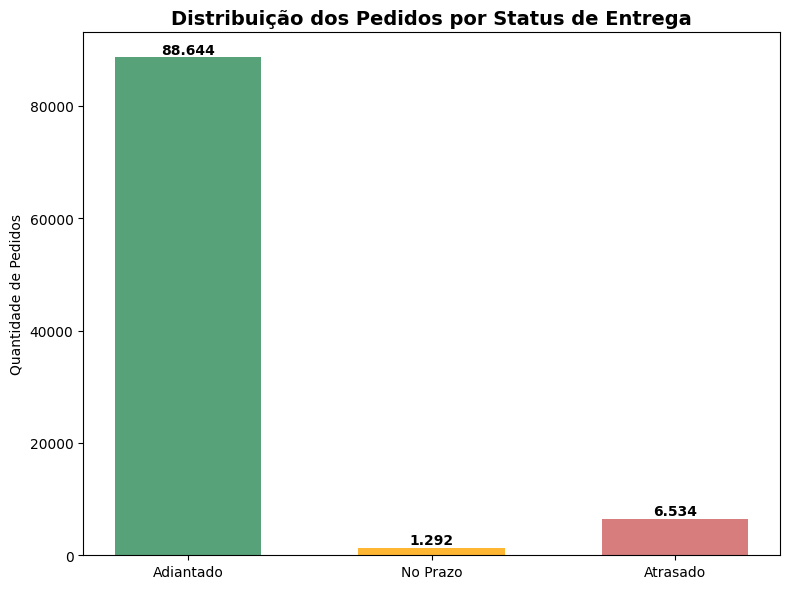

In [14]:
# DISTRIBUIÇÃO DOS PEDIDOS POR STATUS DE ENTREGA

total = len(orders_entregue)
adiantados = len(orders_entregue[orders_entregue['atraso'] < 0])
no_prazo = len(orders_entregue[orders_entregue['atraso'] == 0])
atrasados = len(orders_entregue[orders_entregue['atraso'] > 0])

categories = ['Adiantado', 'No Prazo', 'Atrasado']
values = [adiantados, no_prazo, atrasados]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=['#2E8B57', '#FFA500', '#CD5C5C'], alpha=0.8, width=0.6)
plt.title('Distribuição dos Pedidos por Status de Entrega', fontsize=14, fontweight='bold')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=0)

for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{value:,}'.replace(',', '.'), 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()



In [15]:
# Média geral de atraso na entrega
media_atrasados = orders_atrasados["atraso"].mean()

media_atrasados


np.float64(10.620140801958984)

In [16]:
#média geral de pedidos regulares na entrega
orders_regular = orders_entregue[orders_entregue["atraso"]< 0].copy()

media_regular = orders_regular["atraso"].mean()

media_regular = abs(media_regular)

media_regular


np.float64(13.707177022697532)

2.1 VISUALIZAÇÕES

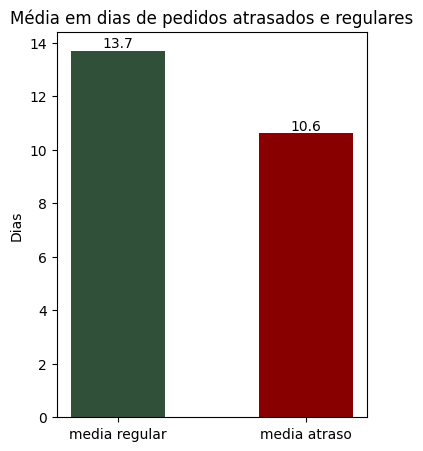

In [17]:
#MÉDIA DOS PEDIDOS ATRASADOS E REGULARES    

media_orders = [(media_regular), (media_atrasados)]

rotulos = ["media regular", "media atraso"]

plt.figure(figsize=(4, 5))
barras = plt.bar(rotulos, media_orders, color=["#30503A", "#880000"], width=0.5)
plt.title("Média em dias de pedidos atrasados e regulares")
plt.ylabel("Dias")
plt.bar_label(barras, fmt="%.1f")  # mostra duas casas decimais
plt.show()


In [18]:
# Criando cópia do DataFrame original
reviews_edit = reviews.copy()


reviews_edit.head()

reviews_edit = reviews_edit.rename(columns={
"review_id": "id_avaliacao",
"review_score": "nota_avaliacao",
"review_comment_title": "titulo_comentario",
"review_comment_message": "mensagem_comentario",
"review_creation_date": "data_avaliacao",
"review_answer_timestamp": "data_resposta_avaliacao",       
"id_pedido" : "order_id"
})

colunas_review = ["data_avaliacao","data_resposta_avaliacao"]

#eliminando horas da coluna data_resposta_avaliacao e review
for colunas in colunas_review:
    reviews_edit[colunas] = pd.to_datetime(reviews_edit[colunas]).dt.date 

reviews_edit



,id_avaliacao,order_id,nota_avaliacao,titulo_comentario,mensagem_comentario,data_avaliacao,data_resposta_avaliacao
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02


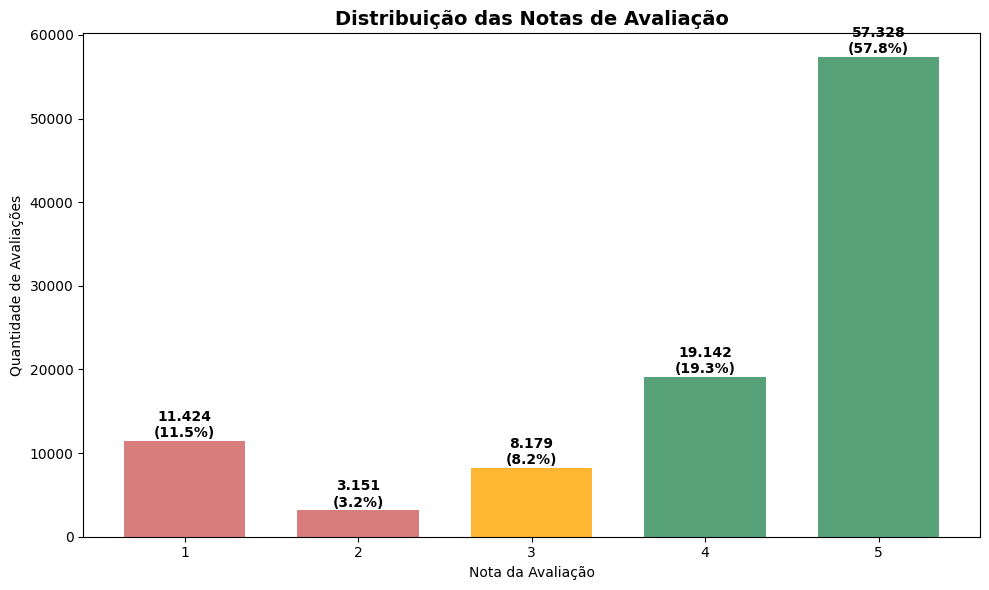

In [19]:
# DISTRIBUIÇÃO DAS NOTAS DE AVALIAÇÃO

plt.figure(figsize=(10, 6))
distribuicao_notas = reviews_edit['nota_avaliacao'].value_counts().sort_index()
bars = plt.bar(distribuicao_notas.index, distribuicao_notas.values, 
               color=['#CD5C5C', '#CD5C5C', '#FFA500', '#2E8B57', '#2E8B57'], 
               alpha=0.8, width=0.7)
plt.title('Distribuição das Notas de Avaliação', fontsize=14, fontweight='bold')
plt.xlabel('Nota da Avaliação')
plt.ylabel('Quantidade de Avaliações')
plt.xticks([1, 2, 3, 4, 5])

total_avaliacoes = len(reviews_edit)
for bar, nota in zip(bars, distribuicao_notas.index):
    height = bar.get_height()
    porcentagem = (height / total_avaliacoes) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{height:,}\n({porcentagem:.1f}%)'.replace(',', '.'), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()




  status_entrega  nota_avaliacao
0       Atrasado        2.271025
1       No prazo        4.289980


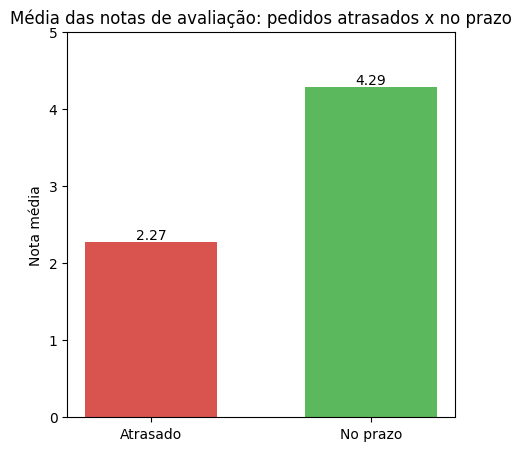

In [20]:
# Como as notas de avaliação variam entre pedidos com e sem atraso?  


# Juntando os pedidos entregues com as avaliações
df_merge = pd.merge(orders_entregue, reviews_edit, on="order_id", how="inner")

# Criando uma nova coluna para indicar se o pedido foi atrasado ou não
df_merge["status_entrega"] = "No prazo"   # valor padrão
df_merge.loc[df_merge["data_entrega"] > df_merge["data_prevista"], "status_entrega"] = "Atrasado"

# Calculando a média das notas para cada tipo de entrega
media_notas = df_merge.groupby("status_entrega")["nota_avaliacao"].mean().reset_index()

# Mostrando as médias
print(media_notas)

# Fazendo o gráfico de comparação
plt.figure(figsize=(5,5))
barras = plt.bar(media_notas["status_entrega"], media_notas["nota_avaliacao"],
                 color=[ "#D9534F", "#5CB85C"], width=0.6)
plt.title("Média das notas de avaliação: pedidos atrasados x no prazo")
plt.ylabel("Nota média")
plt.ylim(0, 5)
plt.bar_label(barras, fmt="%.2f")
plt.show()



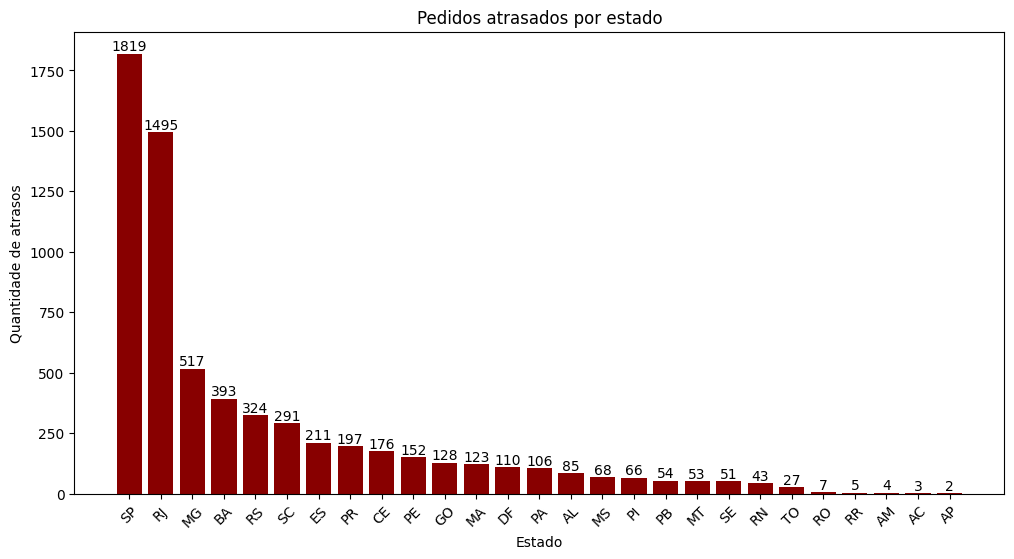

In [21]:
#Atrasos por estado

#Um estado por CEP 
geolocation_unique = geolocation_edit.drop_duplicates(subset=["cep_prefixo"])

#merge com o estado do cliente
geo_merge = pd.merge(
    orders_entregue,
    customers_edit[["id_cliente", "cep_prefixo"]],
    left_on="customer_id", right_on="id_cliente", how="left"
)

geo_merge = pd.merge(
    geo_merge,
    geolocation_unique[["cep_prefixo", "estado"]],
    on="cep_prefixo", how="left"
)

# Criando coluna para marcar atrasos
geo_merge["status_entrega"] = np.where(geo_merge["atraso"] > 0, "Atrasado", "No prazo")


# Contando atrasos por estado
atrasos_estado = (
    geo_merge[geo_merge["status_entrega"] == "Atrasado"]["estado"]
    .value_counts()
    .reset_index()
)
atrasos_estado.columns = ["estado", "qtd_atrasos"]

# Gráfico
plt.figure(figsize=(12,6))
barras = plt.bar(atrasos_estado["estado"], atrasos_estado["qtd_atrasos"], color="#880000")
plt.title("Pedidos atrasados por estado")
plt.ylabel("Quantidade de atrasos")
plt.xlabel("Estado")
plt.xticks(rotation=45)
plt.bar_label(barras)
plt.show()


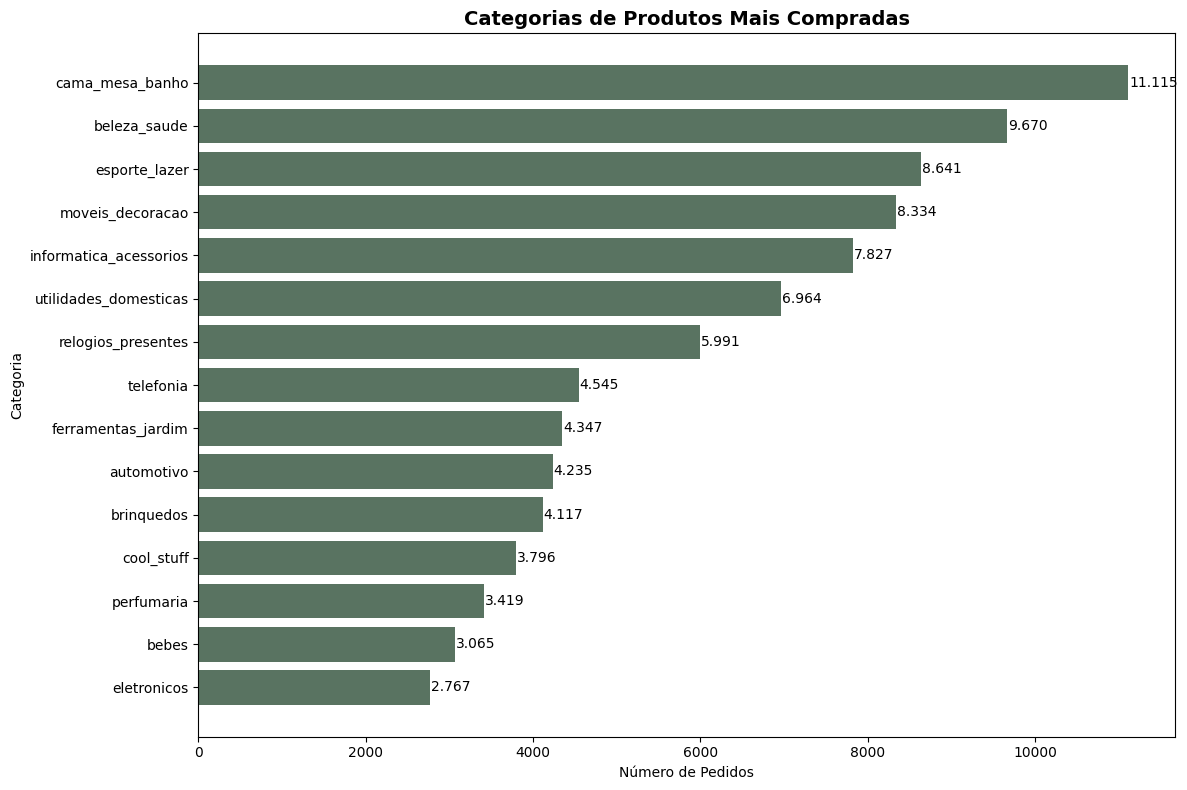

In [22]:
# CATEGORIAS DE PRODUTOS MAIS COMPRADAS

order_items = pd.read_csv(r"datasets\olist_order_items_dataset.csv")

product_with_id = product.copy()

orders_with_categories = order_items.merge(
    product_with_id[['product_id', 'product_category_name']], 
    on='product_id', 
    how='left'
)

categorias_mais_compradas = orders_with_categories['product_category_name'].value_counts().head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(categorias_mais_compradas)), categorias_mais_compradas.values, color='#30503A', alpha=0.8)
plt.title('Categorias de Produtos Mais Compradas', fontsize=14, fontweight='bold')
plt.xlabel('Número de Pedidos')
plt.ylabel('Categoria')
plt.yticks(range(len(categorias_mais_compradas)), categorias_mais_compradas.index)
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}'.replace(',', '.'), 
             ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()




        categoria_produto  qtd_avaliacoes_negativas
0         cama_mesa_banho                      2011
1        moveis_decoracao                      1484
2  informatica_acessorios                      1311
3            beleza_saude                      1178
4           esporte_lazer                      1098


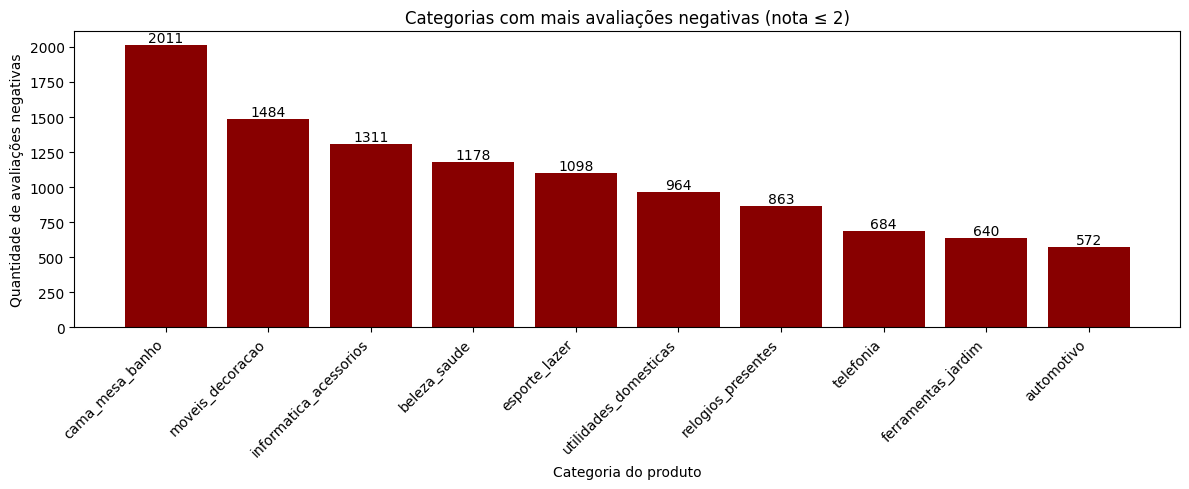

In [23]:
# Quais categorias de produtos concentram a maioria das avaliações negativas?

# Juntar pedidos, avaliações e produtos corretamente
order_items = pd.read_csv(r"datasets\olist_order_items_dataset.csv")
product_with_id = product.copy()  # dataset original com o product_id

df_cat = pd.merge(orders_entregue, reviews_edit, on="order_id", how="inner")
df_cat = pd.merge(df_cat, order_items[["order_id", "product_id"]], on="order_id", how="left")
df_cat = pd.merge(df_cat, product_with_id[["product_id", "product_category_name"]], on="product_id", how="left")

# Criando coluna para identificar avaliações negativas (nota ≤ 2)
df_cat["avaliacao_negativa"] = np.where(df_cat["nota_avaliacao"] <= 2, "Sim", "Não")

# Contando avaliações negativas por categoria
cat_negativa = (
    df_cat[df_cat["avaliacao_negativa"] == "Sim"]["product_category_name"]
    .value_counts()
    .reset_index()
)
cat_negativa.columns = ["categoria_produto", "qtd_avaliacoes_negativas"]

print(cat_negativa.head())

# Gráfico com as 10 categorias com mais avaliações negativas
plt.figure(figsize=(12,5))
barras = plt.bar(cat_negativa["categoria_produto"][:10],
                 cat_negativa["qtd_avaliacoes_negativas"][:10],
                 color="#880000")
plt.title("Categorias com mais avaliações negativas (nota ≤ 2)")
plt.ylabel("Quantidade de avaliações negativas")
plt.xlabel("Categoria do produto")
plt.xticks(rotation=45, ha="right")
plt.bar_label(barras)
plt.tight_layout()
plt.show()


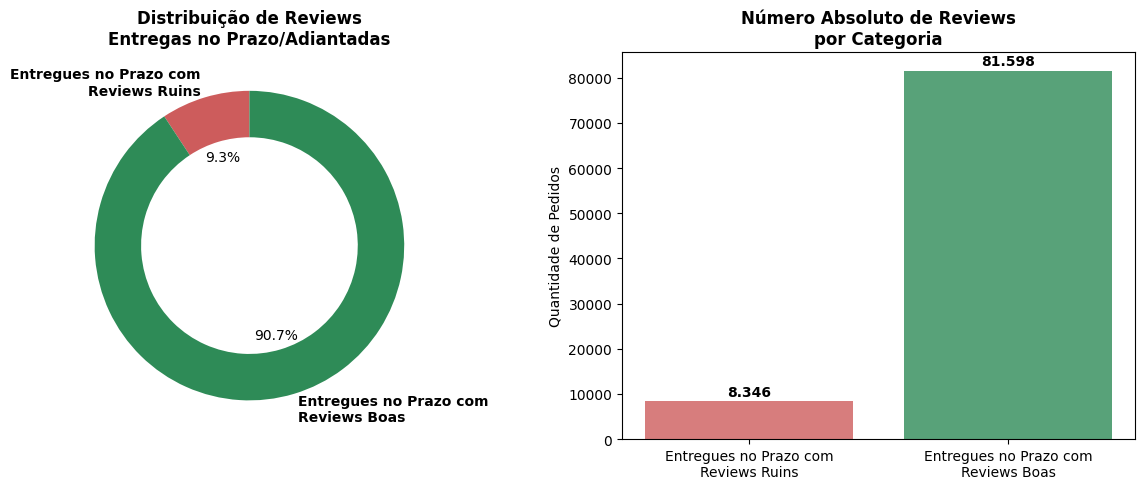

In [24]:
# ANÁLISE MULTIFATORIAL - REVIEWS RUINS SEM ATRASO


# Unindo os pedidos entregues com as notas de avaliação (mesmo sem review)
orders_entregue_reviews = pd.merge(
    orders_entregue,
    reviews_edit[['order_id', 'nota_avaliacao']],
    on='order_id',
    how='left'
)

# Removendo pedidos sem nota de avaliação (NaN)
orders_entregue_reviews = orders_entregue_reviews.dropna(subset=['nota_avaliacao'])

# Definindo limite para considerar review ruim
limite_review_ruim = 2

# Filtrando apenas entregas no prazo (ou adiantadas)
no_prazo = orders_entregue_reviews[orders_entregue_reviews["atraso"] <= 0]

# Separando reviews ruins e boas
reviews_ruins = no_prazo[no_prazo["nota_avaliacao"] <= limite_review_ruim]
reviews_boas = no_prazo[no_prazo["nota_avaliacao"] > limite_review_ruim]

# Contagem para o gráfico
categories = ['Entregues no Prazo com\nReviews Ruins', 'Entregues no Prazo com\nReviews Boas']
values = [len(reviews_ruins), len(reviews_boas)]

# Criando os gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- Gráfico 1: Rosca (percentual) ---
colors = ['#CD5C5C', '#2E8B57']
wedges, texts, autotexts = ax1.pie(
    values, labels=categories, colors=colors, autopct='%1.1f%%',
    startangle=90, wedgeprops=dict(width=0.3)
)
ax1.set_title('Distribuição de Reviews\nEntregas no Prazo/Adiantadas', fontweight='bold')

for text in texts:
    text.set_fontweight('bold')

# --- Gráfico 2: Barras (quantidade absoluta) ---
bars = ax2.bar(categories, values, color=colors, alpha=0.8)
ax2.set_title('Número Absoluto de Reviews\npor Categoria', fontweight='bold')
ax2.set_ylabel('Quantidade de Pedidos')

for bar, value in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 500,
             f'{value:,}'.replace(',', '.'), 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()




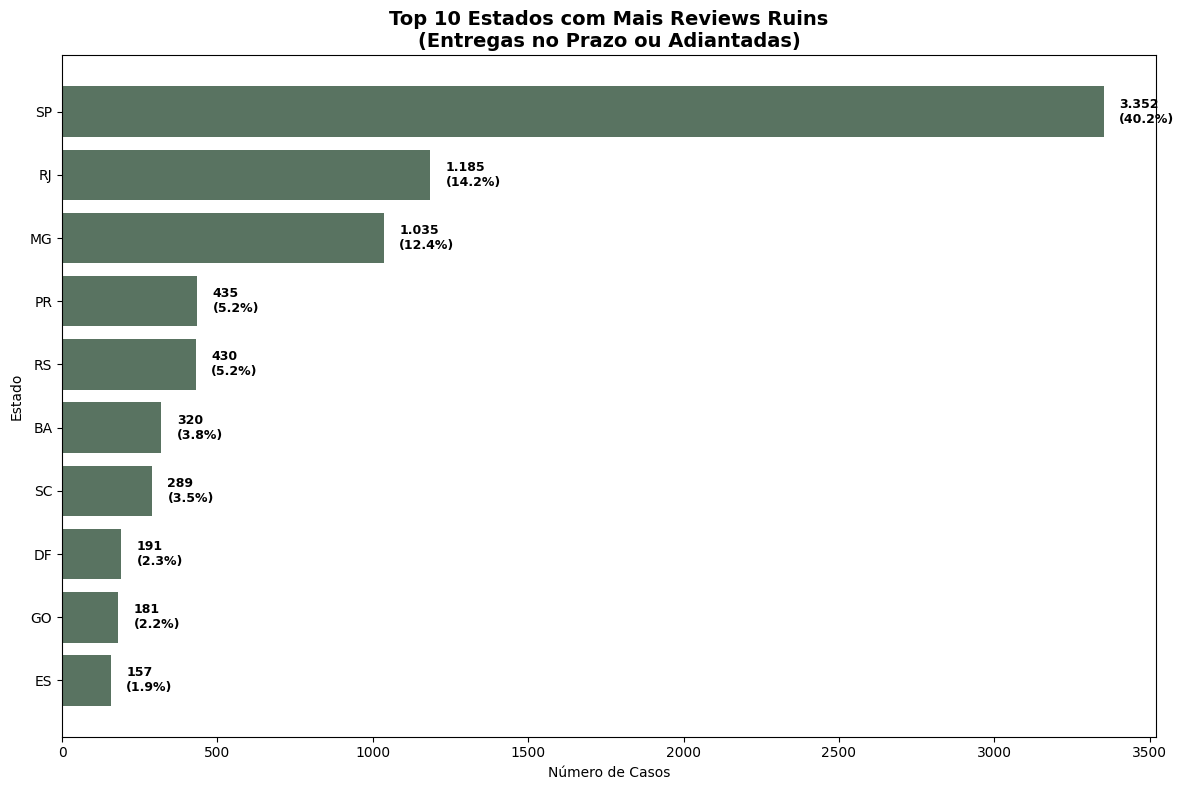

In [25]:
# ANÁLISE GEOGRÁFICA - ESTADOS COM MAIS REVIEWS RUINS


# Usa a mesma base do bloco 7 (orders_entregue_reviews)
# Mantém apenas entregas no prazo ou adiantadas
no_prazo_geo = orders_entregue_reviews[orders_entregue_reviews["atraso"] <= 0].copy()

# Merge com a tabela de clientes para identificar o estado
reviews_estado = pd.merge(
    no_prazo_geo,
    customers_edit[['id_cliente', 'estado_cliente']],
    left_on='customer_id',
    right_on='id_cliente',
    how='left'
)

# Filtrando apenas reviews ruins (nota <= 2)
limite_review_ruim = 2
reviews_estado_ruins = reviews_estado[reviews_estado["nota_avaliacao"] <= limite_review_ruim]

# Contagem por estado
top_estados = reviews_estado_ruins["estado_cliente"].value_counts().head(10)

# --- GRÁFICO ---
plt.figure(figsize=(12, 8))
bars = plt.barh(top_estados.index, top_estados.values, color='#30503A', alpha=0.8)
plt.title('Top 10 Estados com Mais Reviews Ruins\n(Entregas no Prazo ou Adiantadas)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Número de Casos')
plt.ylabel('Estado')
plt.gca().invert_yaxis()

# Adicionando rótulos
total_casos = len(reviews_estado_ruins)
for bar, value in zip(bars, top_estados.values):
    width = bar.get_width()
    porcentagem = (value / total_casos) * 100
    plt.text(width + 50, bar.get_y() + bar.get_height()/2,
             f'{value:,}\n({porcentagem:.1f}%)'.replace(',', '.'),
             ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()




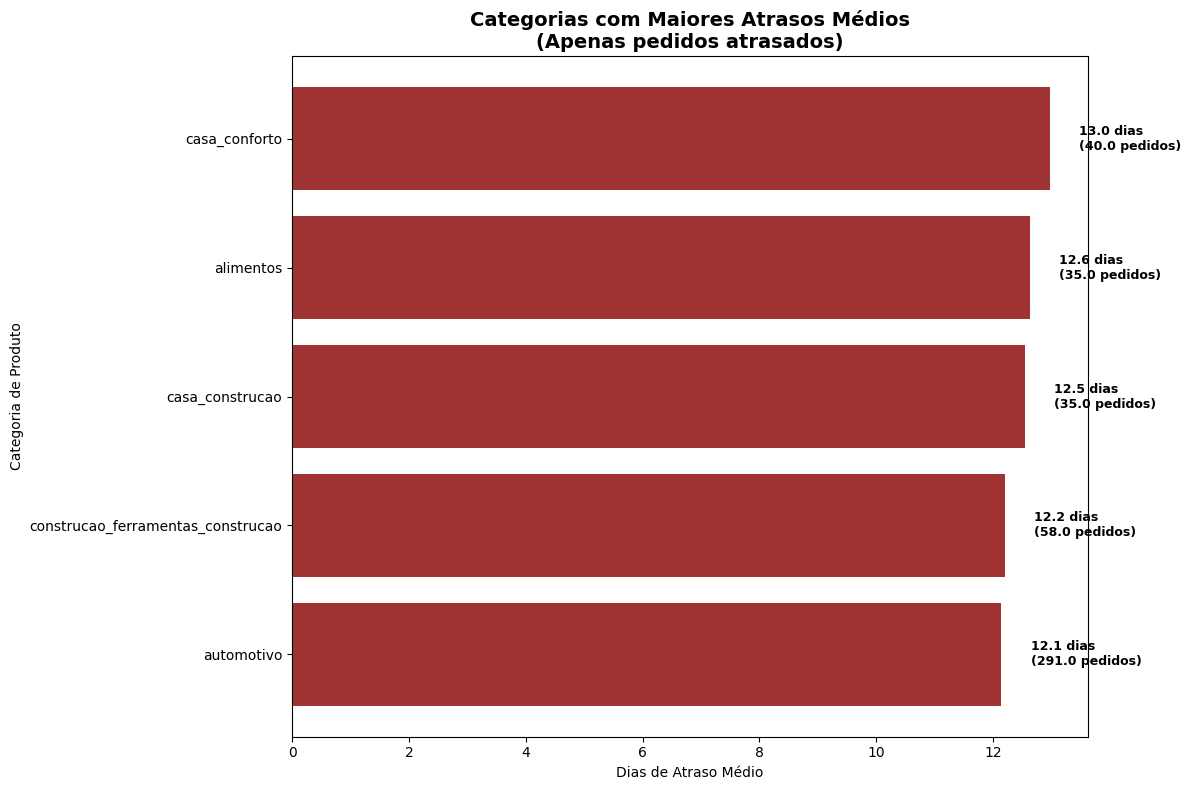

In [26]:
# CATEGORIAS COM MAIORES ATRASOS MÉDIOS

pedidos_atrasados_com_produtos = orders_entregue[orders_entregue["atraso"] > 0].merge(
    order_items[['order_id', 'product_id']],
    on='order_id',
    how='left'
).merge(
    product_with_id[['product_id', 'product_category_name']],
    on='product_id',
    how='left'
)

atraso_medio_por_categoria = pedidos_atrasados_com_produtos.groupby('product_category_name')['atraso'].agg([
    ('media_atraso', 'mean'),
    ('qtd_pedidos', 'count')
]).sort_values('media_atraso', ascending=False).head(15)

categorias_significativas = atraso_medio_por_categoria[atraso_medio_por_categoria['qtd_pedidos'] >= 30]

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(categorias_significativas)), 
                categorias_significativas['media_atraso'], 
                color='#880000', alpha=0.8)
plt.title('Categorias com Maiores Atrasos Médios\n(Apenas pedidos atrasados)', fontsize=14, fontweight='bold')
plt.xlabel('Dias de Atraso Médio')
plt.ylabel('Categoria de Produto')
plt.yticks(range(len(categorias_significativas)), categorias_significativas.index)
plt.gca().invert_yaxis()

for i, (bar, row) in enumerate(zip(bars, categorias_significativas.iterrows())):
    categoria, dados = row
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f} dias\n({dados["qtd_pedidos"]:,} pedidos)'.replace(',', '.'), 
             ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()




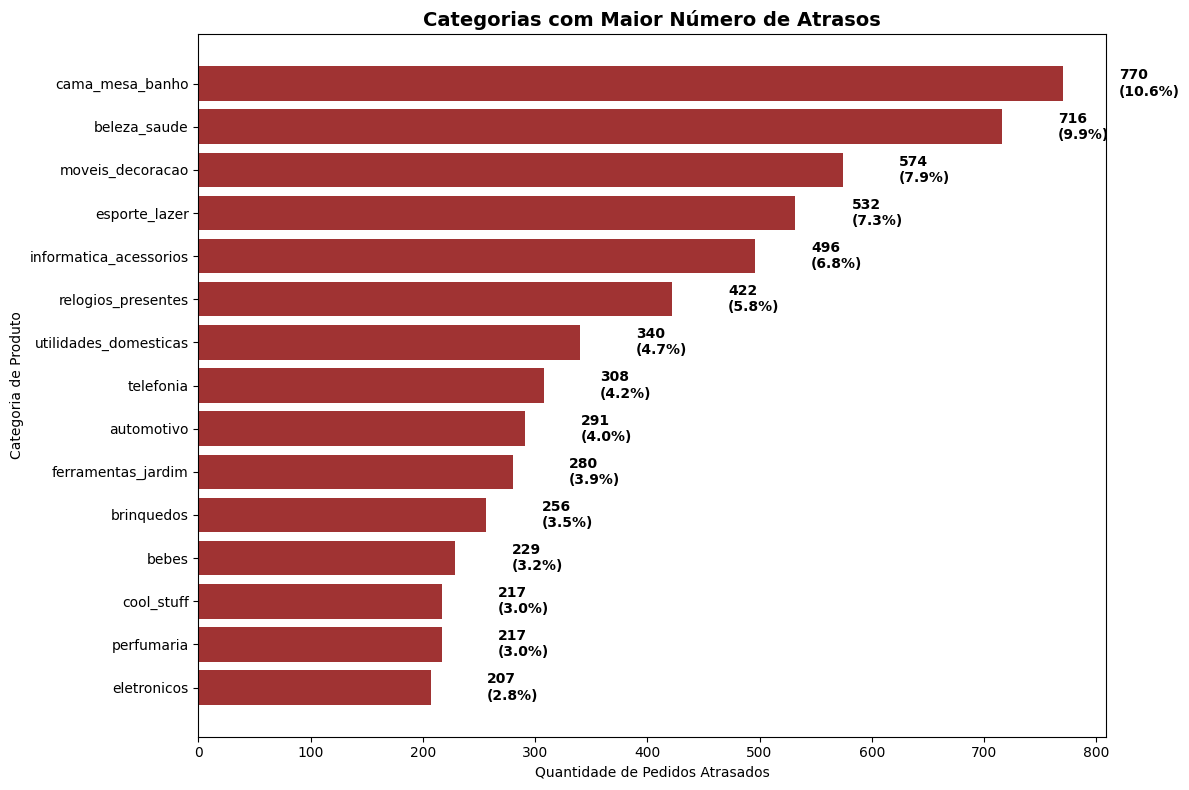

In [27]:
# CATEGORIAS COM MAIOR NÚMERO DE ATRASOS

categorias_mais_atrasadas = pedidos_atrasados_com_produtos['product_category_name'].value_counts().head(15)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(categorias_mais_atrasadas)), 
                categorias_mais_atrasadas.values, 
                color='#880000', alpha=0.8)
plt.title('Categorias com Maior Número de Atrasos', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade de Pedidos Atrasados')
plt.ylabel('Categoria de Produto')
plt.yticks(range(len(categorias_mais_atrasadas)), categorias_mais_atrasadas.index)
plt.gca().invert_yaxis()

total_pedidos_atrasados = len(pedidos_atrasados_com_produtos)
for i, (bar, value) in enumerate(zip(bars, categorias_mais_atrasadas.values)):
    width = bar.get_width()
    porcentagem = (value / total_pedidos_atrasados) * 100
    plt.text(width + 50, bar.get_y() + bar.get_height()/2, 
             f'{value:,}\n({porcentagem:.1f}%)'.replace(',', '.'), 
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()




### 4. CONCLUSÃO <h1>

- Ao comparar *pedidos com e sem atraso, observou-se que as **notas médias* dos pedidos *atrasados são menores, mostrando que **atraso impacta diretamente* na satisfação do cliente.  
- No entanto, ao analisar *as categorias de produto, algumas apresentaram **notas médias baixas* mesmo quando não havia atraso, indicando que *características do produto* (ex: tipo, qualidade, embalagem, expectativa do cliente) também influenciam na avaliação.  
- Na análise por estado, também foi possível observar variações significativas. Isso sugere que *questões logísticas regionais* ou problemas específicos de transporte em certas regiões podem contribuir para avaliações piores.

*Conclusão:*  
O atraso é sim um *fator importante* nas notas de avaliação,  
mas *não é o único*.  
A categoria do produto e a localização geográfica também têm impacto na experiência do cliente.

